In [1]:
# libraries
import sys; sys.path.insert(0, '..') # if you don't find it here, look one above
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as spio
import pickle
# stored one repo up in my fork of Spykes
from spykes.spykes.plot.neurovis import NeuroVis
from io_utils import *
from plotting_utils import * 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

In [2]:
# base paths/names
sess_names = np.load('sess_names.npy')
sess_name = sess_names[4]

base_path  = 'Y:\jbreda\ephys\post_sort_analysis\sorted_pre_bdata' 
beh_mat   = 'protocol_info.mat'
spks_mat  = 'ksphy_clusters_foranalysis.mat'


# create paths
sess_path = os.path.join(base_path, sess_name)
beh_path  = os.path.join(sess_path, beh_mat)
spks_path = os.path.join(sess_path, spks_mat)
fig_save_path = os.path.join(os.getcwd(), 'figures', 'neurovis', sess_name)

# load & wrangle
beh_df, spks_dict = load_and_wrangle(beh_path, spks_path, overwrite=True)


C:\Users\brodylab\Documents\GitHub\jbreda_PWM_ephys_analysis\io_utils.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beh_df['hit_hist'][beh_df['hit_hist'].isnull()] = "viol"


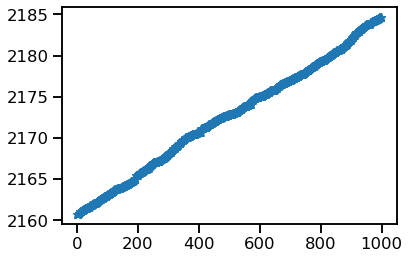

In [46]:
plt.plot(spks_dict['spk_times'][0][79000:80000], '*')

In [6]:
# filter dataframe
beh_df_d2_h = beh_df[(beh_df['delay'] == 2)
       & (beh_df['hit_hist'] == 'hit')]

# deal with masking
bndl_dfs, df_names = deal_with_masking(spks_dict, beh_df_d2_h, sess_path)

Loading existing mask_dict...
Done loading.
ngood, first: 55
ngood, first: 55
ngood, second: 57
ngood, second: 57
ngood, second: 57
ngood, second: 57


In [76]:
# initilaize
events = ['aud1_on']
windows = [[-1000,2300]]
condition = 'correct_side'

# get neurons into NeuroVis objects
neurons = initiate_neurons(spks_dict)
neuron = NeuroVis(spks_dict['spk_times'][0])

#single neuron debug
window = windows[0]
binsize = 100
df = bndl_dfs[df_names[0]]
phys_start = neuron.spiketimes[0]
phys_end = neuron.spiketimes[-1]
sub_df = df.query('hit_state < @phys_end & c_poke > @phys_start')
event = events[0]
conditions = 'correct_side'

In [12]:
for i in range(len(neurons)):
    print(neurons[i].spiketimes[0], neurons[i]sp)

41.62536763446176
4.445483935980218
7.075451532646395
49.320369732448
2.0342433600549006
2.74375896711459


In [13]:
neuron_rasters = get_neuron_rasters(neurons, events, windows, bndl_dfs, df_names)
neuron_psths = get_neuron_psths(neurons, events, windows, bndl_dfs, df_names, conditions=condition)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3]
1743.7613816349206 1744.453366 1746.7708350178157
2015.1922911667677 2016.187367 2018.4938303195804
2218.2914630755527 2219.240354 2221.606534902403
2304.0952494805088 2305.053357 2307.3541240452246
2460.3906016175206 2461.385359 2463.7025402636823
2508.5175235959446 2509.498354 2511.808896577375
2555.444237380463 2556.436353 2558.740510123183
2592.486066078539 2593.484355 2595.78830519725
2623.060943172386 2623.94035 2626.2761865294306
2716.98803381931 2717.978357 2720.297872567776
2728.5118723911587 2729.483358 2731.7975789819825
2803.449688173697 2804.441359 2806.7738595572264
3344.1893106283674 3344.848352 3347.184031395685
3467.45727182185 3468.455372 3470.7874762447905
3999.124736261617 4000.114353 4002.444041215567


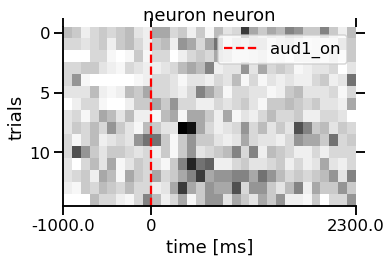

In [261]:
raster = neuron.get_raster(event = events[0], window = windows[0], binsize = 100, df = sub_df)

# np.sum(raster['data'][0], axis = 1)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3]
1743.7613816349206 1744.453366 1746.7708350178157
2015.1922911667677 2016.187367 2018.4938303195804
2218.2914630755527 2219.240354 2221.606534902403
2304.0952494805088 2305.053357 2307.3541240452246
2460.3906016175206 2461.385359 2463.7025402636823
2508.5175235959446 2509.498354 2511.808896577375
2555.444237380463 2556.436353 2558.740510123183
2592.486066078539 2593.484355 2595.78830519725
2623.060943172386 2623.94035 2626.2761865294306
2716.98803381931 2717.978357 2720.297872567776
2728.5118723911587 2729.483358 2731.7975789819825
2803.449688173697 2804.441359 2806.7738595572264
3344.1893106283674 3344.848352 3347.184031395685
3467.45727182185 3468.455372 3470.7874762447905
3999.124736261617 4000.114353 4002.444041215567
15


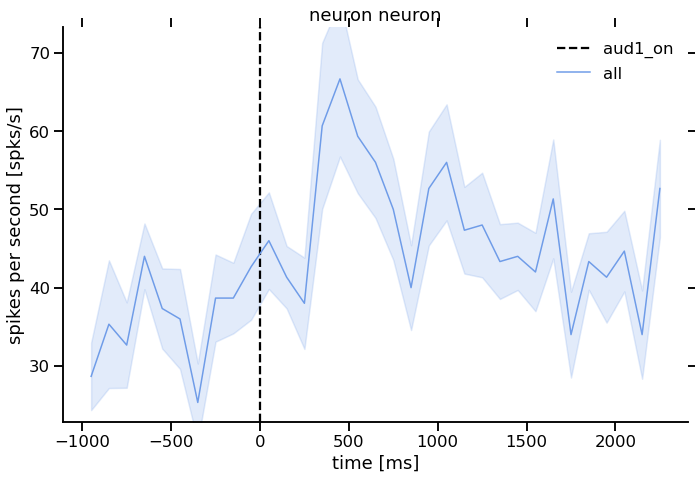

In [262]:

fig = plt.subplots(figsize = (10,7))
psth = neuron.get_psth(event = events[0], window = windows[0], binsize = 100, df = sub_df)



In [264]:
if not type(df) is dict:
        df = df.reset_index()
len(np.sum(raster['data'][0], axis = 1)), len(psth['data'][0]['mean'])

(15, 33)

In [176]:
if not type(df) is dict:
    df2 = df.reset_index()
wind = [np.floor(window[0]/binsize) * binsize, np.ceil(window[1]/binsize) * binsize]

In [177]:
trials = dict()
trials[0] = np.where(np.ones(np.size(df[event])))[0]
rasters = {
        'event': event,
        'conditions': conditions,
        'window': window,
        'binsize': binsize,
        'data': {},
    }

In [191]:
for cond_id in trials:
    # Select events relevant to this raster
    selected_events = df[event].iloc[trials[cond_id]]

    raster = []
    
    bin_template = 1e-3 * np.arange(window[0], window[1] + binsize, binsize)
    
    for event_time in selected_events:
        bins = event_time + bin_template



In [196]:
bin_template

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3])

In [195]:
for event_time in selected_events:
    bins = event_time + bin_template
    
    searchsorted_idx = np.sq

[5867.858354 5867.958354 5868.058354 5868.158354 5868.258354 5868.358354
 5868.458354 5868.558354 5868.658354 5868.758354 5868.858354 5868.958354
 5869.058354 5869.158354 5869.258354 5869.358354 5869.458354 5869.558354
 5869.658354 5869.758354 5869.858354 5869.958354 5870.058354 5870.158354
 5870.258354 5870.358354 5870.458354 5870.558354 5870.658354 5870.758354
 5870.858354 5870.958354 5871.058354 5871.158354]


In [212]:
event_time, event_time + 1e-3 * window[0], event_time + 1e-3 * window[1]

(5868.858354, 5867.858354, 5871.158354)

TypeError: search side must be str, not list

In [222]:
neuron.spiketimes

array([ 503.5877348 ,  503.61969991,  503.62789951, ..., 4012.60034641,
       4012.62171204, 4012.62581184])

In [223]:
df

,trial_num,hit_hist,delay,pair_hist,correct_side,prev_side,aud1_sigma,aud2_sigma,c_poke,end_state,hit_state,aud1_on,aud1_off,aud2_on,aud2_off
24,25,hit,2,3,RIGHT,LEFT,0.019683,0.007290,452.439361,457.385354,456.249353,452.490351,452.890351,454.890353,455.290354
48,49,hit,2,10,RIGHT,RIGHT,0.013248,0.007300,1744.403361,1749.430360,1748.394364,1744.453366,1744.853367,1746.854361,1747.254363
74,75,hit,2,8,LEFT,RIGHT,0.019683,0.053144,2016.137360,2021.647357,2020.472354,2016.187367,2016.588351,2018.587364,2018.987363
98,99,hit,2,3,RIGHT,LEFT,0.019683,0.007290,2219.190354,2224.276356,2223.226353,2219.240354,2219.640356,2221.641358,2222.041358
107,108,hit,2,8,LEFT,LEFT,0.019683,0.053144,2305.002356,2310.448362,2309.075363,2305.053357,2305.453357,2307.452356,2307.853354
121,122,hit,2,7,LEFT,LEFT,0.007290,0.019683,2461.335356,2466.995355,2465.550361,2461.385359,2461.785360,2463.785363,2464.185363
127,128,hit,2,2,RIGHT,RIGHT,0.007290,0.002700,2509.448353,2514.752354,2513.431361,2509.498354,2509.898356,2511.899357,2512.298354
132,133,hit,2,9,RIGHT,RIGHT,0.008904,0.007300,2556.385359,2561.490358,2560.248351,2556.436353,2556.836353,2558.835362,2559.235361
136,137,hit,2,1,RIGHT,RIGHT,0.002700,0.001000,2593.434354,2598.733355,2597.301348,2593.484355,2593.884356,2595.884363,2596.285348
139,140,hit,2,12,LEFT,LEFT,0.002704,0.007300,2623.889360,2628.857360,2627.678359,2623.940350,2624.340352,2626.340356,2626.740353
